![Xilinx Logo](images/xilinx_logo.png "Xilinx Logo")

# 1. Introduction

This notebook demonstrates how to use the hardware monitors for power monitoring at specific rails

In this notebook, you will:
1. Plot the power utilization in a real-time graph

# 2. Imports and Initialization

Import all python modules required for this notebook. 

In [1]:
import os
import sys
import time
import psutil

from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# 2. Plot and Read the Throughput Values in Real-Time

The Versal Board consists of multiple power rails. 17 of these rails have INA226 Hardware Monitors built in for tracking power consumption. These monitors can be read to gather information regarding power consumption throughout the board.

The rails with monitoring include:

| Rail Name | Vout (V) |
| --- | --- |
| vccint | 0.78 |
| vcc soc | 0.78 |
| vcc pmc | 0.78 |
| vcc ram | 0.78 |
| vcc pslp | 0.78 |
| vcc psfp | 0.78 |
| vccaux | 1.5 |
| vccaux pmc | 1.5 |
| vcco mio | 1.8 |
| vcc 1v8 | 1.8 |
| vcc 3v3 | 3.3 |
| vcc 1v2 ddr4 | 1.2 |
| vcc 1v1 lp4 | 1.1 |
| vadj fmc | 1.5 |
| mgtyavcc | 0.88 |
| mgtyavtt | 1.2 |
| mgty vccaux | 1.5 |

For more information regarding the power rails, refer to: 
https://www.xilinx.com/content/dam/xilinx/support/documentation/boards_and_kits/vck190/ug1366-vck190-eval-bd.pdf

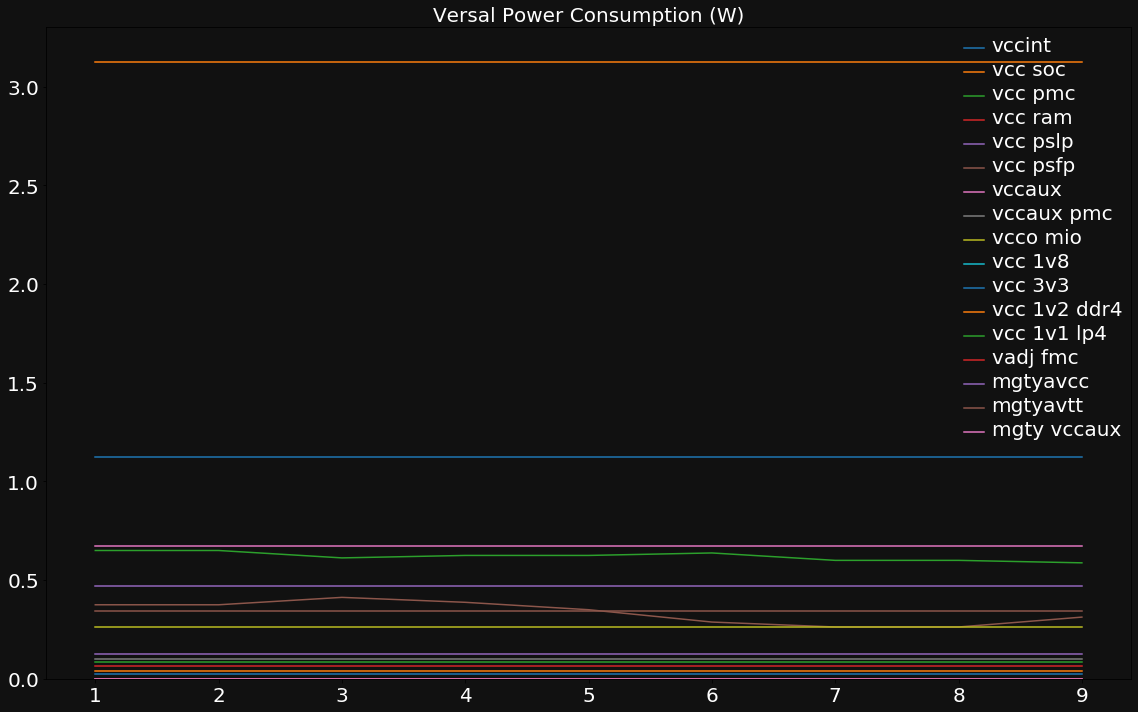

In [ ]:
data = {}
labels = [
    "vccint",
    "vcc soc",
    "vcc pmc",
    "vcc ram",
    "vcc pslp",
    "vcc psfp",
    "vccaux",
    "vccaux pmc",
    "vcco mio",
    "vcc 1v8",
    "vcc 3v3",
    "vcc 1v2 ddr4",
    "vcc 1v1 lp4",
    "vadj fmc",
    "mgtyavcc",
    "mgtyavtt",
    "mgty vccaux"
]

max_len = 10

for i in range(len(labels)):
    data[labels[i]] = []
    
while True:
    power_readings = []
    for i in range(len(labels)):
        power_readings.append(open('/sys/class/hwmon/hwmon'+str(i)+'/power1_input','r').read())
    power_readings = [int(power_readings[i]) for i in range(len(power_readings))]
    clear_output(wait=True)
    for i in range(len(power_readings)):
        #convert power measurements to watts from microwatts
        power_readings[i] = power_readings[i]*0.000001
    fig, ax = plt.subplots()
    ax.set_facecolor('#111111')
    fig.set_facecolor('#111111')
    ax.set_title('Versal Power Consumption (W)', color='white',size='20')
    plt.setp(plt.getp(ax, 'yticklabels'), color='white',size='20')
    ax.set_xticklabels([i for i in range(max_len)],color='white',size='20')
    fig.set_size_inches(16, 10)
    plt.tight_layout()
    for i in range(len(labels)):
        data[labels[i]].append(power_readings[i])
        if len(data[labels[i]]) == max_len:
            data[labels[i]] = data[labels[i]][1:]
        plt.plot(data[labels[i]],label=labels[i])
    
    plt.legend(facecolor='#111111')
    plt.ylim([0, 3.3])
    leg = plt.legend(framealpha = 0, loc = 'upper right')
    for text in leg.get_texts():
        plt.setp(text, color = 'w', size=20)
    plt.show()
    time.sleep(0.5)

# 3. Summary

In this notebook you learned how to:
1. Display power utilization metrics on a live plot

<center>Copyright© 2019 Xilinx</center>